In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import simplefilter

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

# import warnings filter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline


In [2]:
import csv

with open("datasets/cardiovascular-disease-dataset/cardio_train.csv", 'r', newline='') as f_input, open("datasets/cardiovascular-disease-dataset/dataset.csv", 'w', newline='') as f_output:
    csv.writer(f_output, delimiter=',').writerows(csv.reader(f_input, delimiter=';'))


In [3]:
data = pd.read_csv(
    "datasets/cardiovascular-disease-dataset/dataset.csv")
data.drop("id", axis=1, inplace=True)
data.drop_duplicates(inplace=True)
data["bmi"] = data["weight"] / (data["height"]/100)**2
out_filter = ((data["ap_hi"] > 250) | (data["ap_lo"] > 200))
data = data[~out_filter]
print("Total records in dataset: ", len(data))
data.head


Total records in dataset:  68983


<bound method NDFrame.head of          age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      18393       2     168    62.0    110     80            1     1      0   
1      20228       1     156    85.0    140     90            3     1      0   
2      18857       1     165    64.0    130     70            3     1      0   
3      17623       2     169    82.0    150    100            1     1      0   
4      17474       1     156    56.0    100     60            1     1      0   
...      ...     ...     ...     ...    ...    ...          ...   ...    ...   
69995  19240       2     168    76.0    120     80            1     1      1   
69996  22601       1     158   126.0    140     90            2     2      0   
69997  19066       2     183   105.0    180     90            3     1      0   
69998  22431       1     163    72.0    135     80            1     2      0   
69999  20540       1     170    72.0    120     80            2     1      0   

       al

# Feature Generation (A1)

In [4]:
data.age = data.age/365


In [5]:
out_filter2 = ((data["ap_hi"] < 0) | (data["ap_lo"] < 0))
data = data[~out_filter2]
data.head()


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50.391781,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55.419178,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51.663014,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48.282192,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47.873973,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [6]:
target_name = 'cardio'
data_target = data[target_name]
data = data.drop([target_name], axis=1)
train, test, target, target_test = train_test_split(
    data, data_target, test_size=0.2, random_state=42)
Xtrain, Xval, Ztrain, Zval = train_test_split(
    train, target, test_size=0.3, random_state=42)


# Linear Bayes (A2)

In [7]:
gaussian = GaussianNB()
gaussian.fit(train, target)
acc_gaussian = round(gaussian.score(train, target) * 100, 2)
acc_test_gaussian = round(gaussian.score(test, target_test) * 100, 2)
print("Model accuracy:", acc_gaussian)


Model accuracy: 70.31


# SVC (C1)

In [8]:
linear_svc = LinearSVC(dual=False)  # dual=False when n_samples > n_features.
linear_svc.fit(train, target)
acc_linear_svc = round(linear_svc.score(train, target) * 100, 2)
acc_test_linear_svc = round(linear_svc.score(test, target_test) * 100, 2)
print("SVM accuracy:", acc_linear_svc)


SVM accuracy: 72.46


# Logistic Regression (B2)

In [9]:
logreg = LogisticRegression(max_iter=400)
logreg.fit(train, target)
acc_log = round(logreg.score(train, target) * 100, 2)
acc_test_log = round(logreg.score(test, target_test) * 100, 2)
print("Logistic Regression accuracy:", acc_log)


Logistic Regression accuracy: 72.54


# Models Evaluation

In [10]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear SVC', 'Naive Bayes'],

    'Score_train': [acc_log, acc_linear_svc, acc_gaussian],
    'Score_test': [acc_test_log, acc_test_linear_svc, acc_test_gaussian]
})
models.sort_values(by=['Score_train', 'Score_test'], ascending=False)


,Model,Score_train,Score_test
0,Logistic Regression,72.54,72.57
1,Linear SVC,72.46,72.50
2,Naive Bayes,70.31,70.13


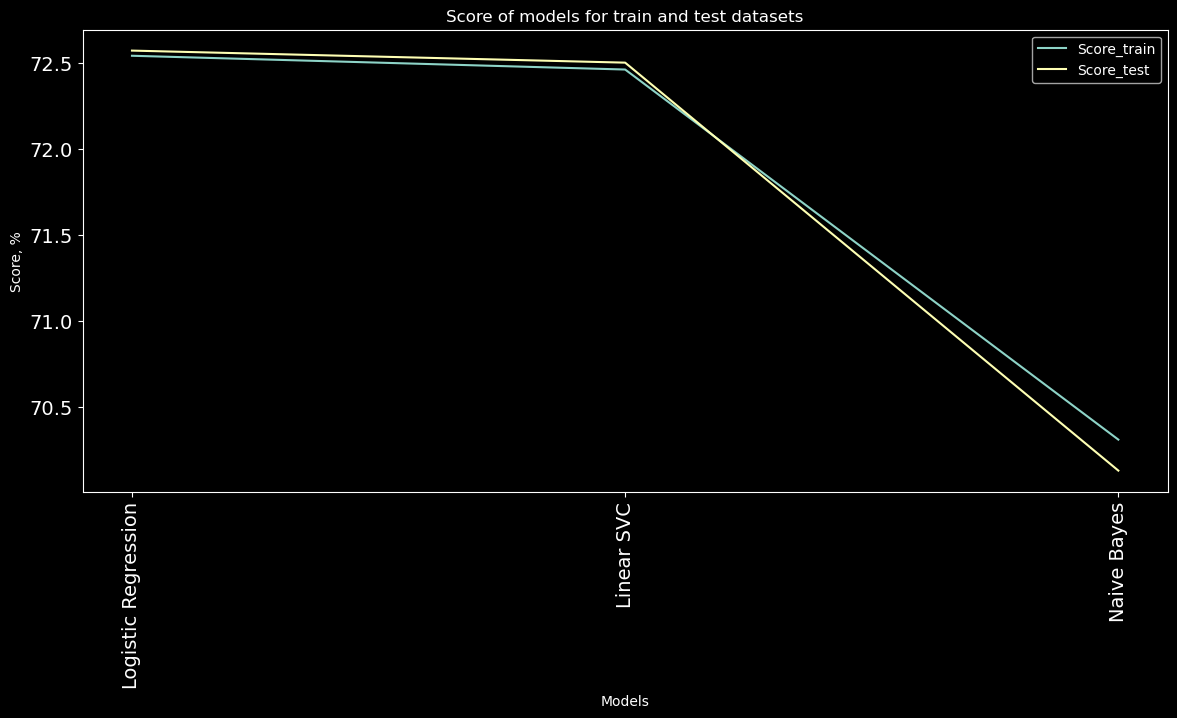

In [11]:
plt.figure(figsize=[14, 6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label='Score_train')
plt.plot(xx, models['Score_test'], label='Score_test')
plt.legend()
plt.title('Score of models for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.show()
